# Thống kê dataset

🧾 Thống kê mô tả các cột số:
            is_final      pre_score    coefficient
count  295198.000000  295198.000000  295198.000000
mean        0.324477    5111.277078      99.574963
std         0.468180    4384.408069       5.838434
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000     100.000000
50%         0.000000    6000.000000     100.000000
75%         1.000000   10000.000000     100.000000
max         1.000000   10000.000000     100.000000

🧾 Thống kê các cột dạng object:
concat('it001',`assignment_id`)       203
concat('it001',`problem_id`)          469
concat('it001', username)            1489
status                                  4
concat('it001',`language_id`)           6
created_at                         284530
updated_at                         242976
judgement                           58406
dtype: int64


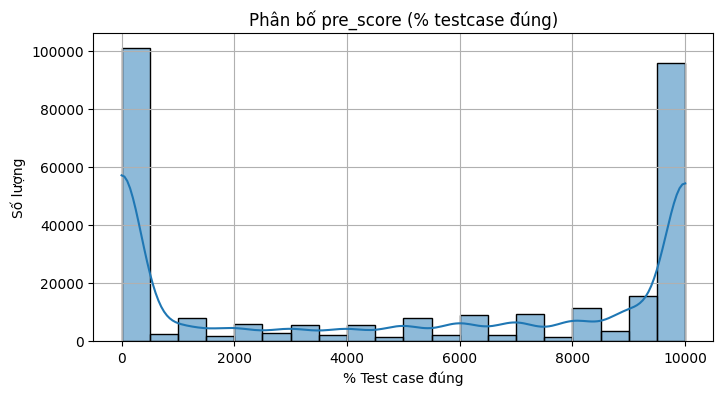

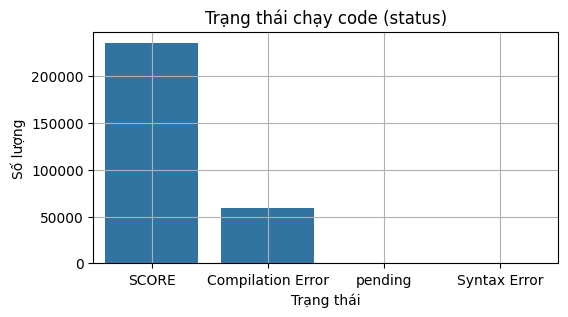

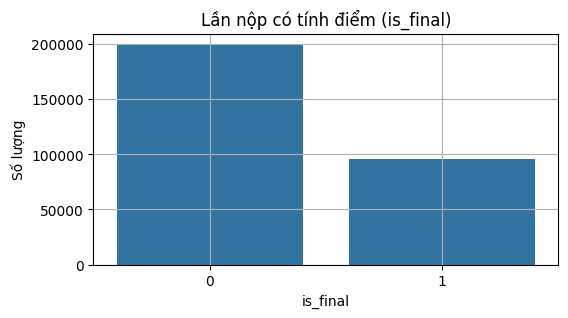

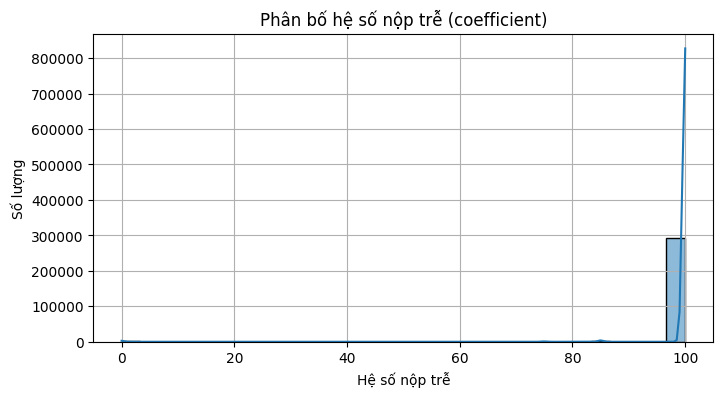

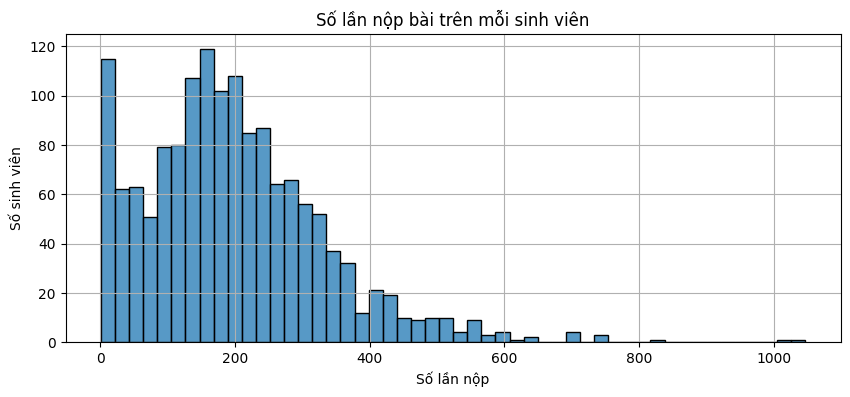

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Đọc dữ liệu ===
file_path = '../data/annonimized.csv'  
df = pd.read_csv(file_path)

# === Thống kê mô tả ===
print("🧾 Thống kê mô tả các cột số:")
print(df.describe())

print("\n🧾 Thống kê các cột dạng object:")
print(df.select_dtypes(include='object').nunique())

# === Trực quan hóa ===

# 1. Phân bố % test case đúng (pre_score)
plt.figure(figsize=(8, 4))
sns.histplot(df['pre_score'], bins=20, kde=True)
plt.title('Phân bố pre_score (% testcase đúng)')
plt.xlabel('% Test case đúng')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

# 2. Trạng thái code chạy được không (status)
plt.figure(figsize=(6, 3))
sns.countplot(x='status', data=df)
plt.title('Trạng thái chạy code (status)')
plt.xlabel('Trạng thái')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

# 3. is_final (nộp chính thức không)
plt.figure(figsize=(6, 3))
sns.countplot(x='is_final', data=df)
plt.title('Lần nộp có tính điểm (is_final)')
plt.xlabel('is_final')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

# 4. hệ số nộp trễ (coefficient)
plt.figure(figsize=(8, 4))
sns.histplot(df['coefficient'], bins=30, kde=True)
plt.title('Phân bố hệ số nộp trễ (coefficient)')
plt.xlabel('Hệ số nộp trễ')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()

# 5. Số lần nộp bài trên mỗi sinh viên
plt.figure(figsize=(10, 4))
df['username'] = df[df.columns[2]]
submission_counts = df['username'].value_counts()
sns.histplot(submission_counts, bins=50)
plt.title('Số lần nộp bài trên mỗi sinh viên')
plt.xlabel('Số lần nộp')
plt.ylabel('Số sinh viên')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Đường dẫn đến file CSV
file_path = '../data/annonimized.csv'  

# Đọc file CSV
df = pd.read_csv(file_path)

# Kiểm tra số lượng và tỷ lệ giá trị thiếu (NaN) trong mỗi cột
missing_values = df.isnull().sum()
num_rows = df.shape[0]

# Tạo bảng thống kê
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Ratio (%)': (missing_values / num_rows * 100).round(2)
})

# In kết quả
print("Thiếu dữ liệu trong từng cột:")
print(missing_summary)


Thiếu dữ liệu trong từng cột:
                                 Missing Count  Missing Ratio (%)
concat('it001',`assignment_id`)              0                0.0
concat('it001',`problem_id`)                 0                0.0
concat('it001', username)                    0                0.0
is_final                                     0                0.0
status                                       0                0.0
pre_score                                    0                0.0
coefficient                                  0                0.0
concat('it001',`language_id`)                0                0.0
created_at                                   0                0.0
updated_at                                   0                0.0
judgement                                    0                0.0


In [2]:
import pandas as pd

# Đọc dữ liệu điểm thực hành
th_scores = pd.read_csv('../data/th-public.csv')  # ['hash', 'TH']

# Tổng số dòng (sinh viên)
total_rows = th_scores.shape[0]

# Số giá trị null
num_null = th_scores['TH'].isna().sum()

# Giá trị không hợp lệ (không thể chuyển thành float, ví dụ: '\xa0', chuỗi rác...)
th_scores['TH_str'] = th_scores['TH'].astype(str).str.strip()
th_scores['TH_clean'] = pd.to_numeric(th_scores['TH_str'], errors='coerce')

num_invalid = th_scores['TH_clean'].isna().sum() - num_null  # Loại trừ NaN gốc

# === In kết quả ===
print(f"📊 Tổng số sinh viên: {total_rows}")
print(f"❌ Số giá trị NULL gốc: {num_null}")
print(f"⚠️ Số giá trị không hợp lệ (chuỗi rác...): {num_invalid}")
print(f"✅ Số sinh viên còn lại hợp lệ: {total_rows - (num_null + num_invalid)}")

# Nếu muốn xem chi tiết các dòng lỗi:
print("\n🔍 Các dòng có giá trị TH không hợp lệ:")
print(th_scores[th_scores['TH_clean'].isna()])


📊 Tổng số sinh viên: 761
❌ Số giá trị NULL gốc: 6
⚠️ Số giá trị không hợp lệ (chuỗi rác...): 2
✅ Số sinh viên còn lại hợp lệ: 753

🔍 Các dòng có giá trị TH không hợp lệ:
                                         hash   TH TH_str  TH_clean
38   06024da8147b5cf6105beb4c403f67cf1ff0aea1  NaN    nan       NaN
83   0d815307d5307124d148bbebfb41497230c4bd15  NaN    nan       NaN
91   0eb93817d6eb3d5bd3e44dbc75971eea193b924f  NaN    nan       NaN
195  209d7c77e7a150b6990a3372f7cb24da0c0e7e07  NaN    nan       NaN
210  2383a9a33025aa8759fee9a890f6420df0fc8b47  NaN    nan       NaN
244  2855b4b4d03c37c94117e615a25e0e321ec8d77a  NaN    nan       NaN
515  59b2a9ae92876d8ce54309fe82bb92d7cffbc794                   NaN
655  7186e8a3fb8c0322eee7e354ed8f1669885f6774                   NaN


# Trích xuất đặc trưng cho từng sinh viên

In [ ]:
import pandas as pd
import numpy as np
import json
import re

# === Load dữ liệu ===
df = pd.read_csv('../data/annonimized.csv')

# === Parse judgement ===
def extract_judgement_features(row):
    try:
        data = json.loads(row)
        times = data.get("times", [])
        mems = data.get("mems", [])
        verdicts = data.get("verdicts", {})

        avg_time = np.mean(times) if times else 0
        avg_mem = np.mean(mems) if mems else 0
        total_verdicts = sum(verdicts.values()) if verdicts else 0
        wrong_count = verdicts.get("WRONG", 0)
        tle_count = verdicts.get("Time Limit Exceeded", 0)
        forbidden = any("forbidden" in key for key in verdicts)

        return pd.Series([avg_time, avg_mem, total_verdicts, wrong_count, tle_count, int(forbidden)])
    except:
        return pd.Series([0, 0, 0, 0, 0, 0])

df[['avg_time', 'avg_mem', 'verdict_count', 'wrong_count', 'tle_count', 'is_forbidden']] = df['judgement'].apply(extract_judgement_features)

# === Chuẩn hóa thời gian (bỏ năm) ===
def remove_year(s):
    return re.sub(r'\b\d{4}-', '', str(s))  # xóa năm nếu có dạng 'YYYY-'

df['created_at_clean'] = df['created_at'].apply(remove_year)

# Parse chuỗi 'MM-DD HH:MM[:SS]' → datetime
df['created_at'] = pd.to_datetime(df['created_at_clean'], format='%m-%d %H:%M:%S', errors='coerce')
df['created_at'] = df['created_at'].fillna(pd.to_datetime(df['created_at_clean'], format='%m-%d %H:%M', errors='coerce'))

# Trích xuất thông tin thời gian
df['submit_day'] = df['created_at'].dt.strftime('%m-%d')
df['submit_hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# === Group theo sinh viên ===
user_col = df.columns[2]  # thường là concat('it001', username)
problem_col = "concat('it001',`problem_id`)"

def compute_features(group):
    group_final = group[group['is_final'] == 1]
    problem_counts = group.groupby(problem_col).size()
    resubmit_rate = (problem_counts > 1).mean()

    return pd.Series({
        # === Cơ bản
        'total_submissions': len(group),
        'final_submissions_count': group['is_final'].sum(),
        'status_success_ratio': (group['status'] == 'SCORE').mean(),
        'average_pre_score': group['pre_score'].mean(),
        'final_average_pre_score': group_final['pre_score'].mean() if len(group_final) > 0 else 0,
        'late_submissions': (group_final['coefficient'] > 1).sum() if len(group_final) > 0 else 0,
        'avg_time_per_test': group['avg_time'].mean(),
        'avg_memory_used': group['avg_mem'].mean(),
        'avg_wrong_verdicts': group['wrong_count'].mean(),
        'avg_tle_verdicts': group['tle_count'].mean(),
        'avg_total_verdicts': group['verdict_count'].mean(),
        'ratio_forbidden_code': group['is_forbidden'].mean(),
        'activity_score': len(group) * (group['status'] == 'SCORE').mean(),

        # === Nâng cao
        'score_std': group['pre_score'].std(),
        'max_pre_score': group['pre_score'].max(),
        'pct_full_score': (group['pre_score'] == 10000).mean(),
        'num_unique_problems': group[problem_col].nunique(),
        'resubmit_ratio': resubmit_rate,

        # Thời gian
        'days_active': group['submit_day'].nunique(),
        'submit_span_hours': (group['created_at'].max() - group['created_at'].min()).total_seconds() / 3600 if group['created_at'].notna().any() else 0,
        'night_submit_ratio': (group['submit_hour'].between(22, 23) | group['submit_hour'].between(0, 5)).mean(),
        'weekend_ratio': group['day_of_week'].isin([5, 6]).mean(),
        'avg_submit_hour': group['submit_hour'].mean()
    })

# === Tạo features_df đầy đủ ===
features_df = df.groupby(user_col).apply(compute_features).reset_index()


C:\Users\admin\AppData\Local\Temp\ipykernel_15684\563750315.py:86: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_df = df.groupby(user_col).apply(compute_features).reset_index()


**1. Đặc trưng cơ bản (mức độ hoạt động)** 

| Feature                   | Giải thích                              | Ý nghĩa                                                   |
| ------------------------- | --------------------------------------- | --------------------------------------------------------- |
| `total_submissions`       | Tổng số lần nộp bài                     | Thể hiện mức độ chăm chỉ, tích cực làm bài                |
| `final_submissions_count` | Số bài có `is_final == 1`               | Là các bài có chấm điểm thực, đại diện cho điểm thực hành |
| `status_success_ratio`    | Tỉ lệ bài có `status == 'SCORE'`        | Cho biết tỷ lệ nộp bài hợp lệ / chạy được                 |
| `average_pre_score`       | Điểm trung bình của tất cả các lần nộp  | Phản ánh mức độ làm bài trung bình                        |
| `final_average_pre_score` | Trung bình điểm các bài `is_final == 1` | Là điểm gần nhất với điểm thực hành chấm chính thức       |
| `late_submissions`        | Số bài nộp trễ (`coefficient > 1`)      | Phản ánh tính kỷ luật, ảnh hưởng đến điểm TH nếu nộp muộn |

**2. Đặc trưng kỹ thuật và lỗi nộp bài**

| Feature                | Giải thích                        | Ý nghĩa                            |
| ---------------------- | --------------------------------- | ---------------------------------- |
| `avg_time_per_test`    | Thời gian trung bình mỗi testcase | Đánh giá độ tối ưu lời giải        |
| `avg_memory_used`      | Bộ nhớ trung bình sử dụng         | Phản ánh độ "nặng" lời giải        |
| `avg_wrong_verdicts`   | Trung bình số testcase sai        | Chất lượng lời giải                |
| `avg_tle_verdicts`     | Trung bình số testcase timeout    | Có thể code chậm hoặc vòng lặp lỗi |
| `avg_total_verdicts`   | Tổng số testcase trong bài        | Cỡ bài, độ khó trung bình          |
| `ratio_forbidden_code` | Tỷ lệ bài dính lỗi forbidden      | Có thể vi phạm quy định chấm       |

**3. Đặc trưng kết quả & nỗ lực**

| Feature               | Giải thích                     | Ý nghĩa                     |
| --------------------- | ------------------------------ | --------------------------- |
| `activity_score`      | Tổng nộp × tỷ lệ SCORE         | Cường độ học tập hiệu quả   |
| `score_std`           | Độ lệch chuẩn điểm             | Sự ổn định giữa các lần nộp |
| `max_pre_score`       | Điểm cao nhất từng đạt         | Năng lực tối đa             |
| `pct_full_score`      | Tỷ lệ bài đạt 100%             | Làm bài chất lượng cao      |
| `num_unique_problems` | Số bài khác nhau đã làm        | Độ đa dạng trong luyện tập  |
| `resubmit_ratio`      | Tỷ lệ bài có nộp lại nhiều lần | Mức độ cố gắng hoàn thiện   |

**4. Đặc trưng về thời gian làm bài**

| Feature              | Giải thích                          | Ý nghĩa                                |
| -------------------- | ----------------------------------- | -------------------------------------- |
| `days_active`        | Số ngày có nộp bài                  | Phản ánh đều đặn trong học tập         |
| `night_submit_ratio` | Tỷ lệ nộp lúc 22h–5h                | Học đêm hoặc cận deadline              |
| `weekend_ratio`      | Tỷ lệ nộp vào T7–CN                 | Có thể học ngoài giờ chính khóa        |




Kiểm tra thằng được 10 đ thực hành

In [17]:
# Tìm dòng tương ứng trong features_df
student_id = '013de369c439ab0ead8aa7da64423aa395a8be39'

# Giả sử cột username đang là cột đầu tiên trong features_df
student_info = features_df[features_df[features_df.columns[0]] == student_id]

# Hiển thị kết quả
print(student_info)

# Nếu bạn dùng notebook:
from IPython.display import display
display(student_info)

                  concat('it001', username)  total_submissions  \
4  013de369c439ab0ead8aa7da64423aa395a8be39              107.0   

   final_submissions_count  status_success_ratio  average_pre_score  \
4                     66.0              0.878505        6474.448598   

   final_average_pre_score  late_submissions  avg_time_per_test  \
4              9176.151515              64.0           0.031732   

   avg_memory_used  avg_wrong_verdicts  ...    score_std  max_pre_score  \
4       186.571709            1.691589  ...  4409.665925        10000.0   

   pct_full_score  num_unique_problems  resubmit_ratio  days_active  \
4        0.551402                 52.0        0.461538          8.0   

   submit_span_hours  night_submit_ratio  weekend_ratio  avg_submit_hour  
4        7515.213611            0.037383            0.0         8.598131  

[1 rows x 24 columns]


,"concat('it001', username)",total_submissions,final_submissions_count,status_success_ratio,average_pre_score,final_average_pre_score,late_submissions,avg_time_per_test,avg_memory_used,avg_wrong_verdicts,...,score_std,max_pre_score,pct_full_score,num_unique_problems,resubmit_ratio,days_active,submit_span_hours,night_submit_ratio,weekend_ratio,avg_submit_hour
4,013de369c439ab0ead8aa7da64423aa395a8be39,107.0,66.0,0.878505,6474.448598,9176.151515,64.0,0.031732,186.571709,1.691589,...,4409.665925,10000.0,0.551402,52.0,0.461538,8.0,7515.213611,0.037383,0.0,8.598131


# Dự đoán điểm

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score


# === Load và làm sạch điểm thực hành ===
th_scores = pd.read_csv('../data/th-public.csv')  # ['hash', 'TH']

# Làm sạch: xử lý các chuỗi không hợp lệ (ví dụ: '\xa0'), sau đó chuyển về số
th_scores['TH'] = th_scores['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()
th_scores['TH'] = pd.to_numeric(th_scores['TH'], errors='coerce')

# Chỉ loại bỏ dòng không có điểm (NaN), vẫn giữ điểm 0.0
th_scores_clean = th_scores.dropna(subset=['TH'])

# === Merge với features_df ===
df_merged = pd.merge(features_df, th_scores_clean, left_on=features_df.columns[0], right_on='hash')

# === Chuẩn bị dữ liệu đầu vào cho mô hình ===
X = df_merged.drop(columns=['hash', 'TH', features_df.columns[0]])
y = df_merged['TH']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

# === Load điểm QT và xử lý ===
th_scores = pd.read_csv('../data/th-public.csv')  # ['hash', 'TH']
th_scores['TH'] = th_scores['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()
th_scores['TH'] = pd.to_numeric(th_scores['TH'], errors='coerce')
th_scores_clean = th_scores.dropna(subset=['TH'])

# === Merge với features_df_qt đã có ===
user_col = features_df.columns[0]  # ví dụ: concat('it001', username)
df_merged = pd.merge(features_df, th_scores_clean, left_on=user_col, right_on='hash')

# === Tạo X, y và xử lý NaN ===
X = df_merged.drop(columns=['hash', 'TH', user_col])
X = X.fillna(X.mean())  # Loại toàn bộ NaN
y = df_merged['TH'].values

# === Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Danh sách mô hình
models = {
    'LinearRegression': LinearRegression(),                          
    'RandomForest': RandomForestRegressor(),                         
    'XGBoost': XGBRegressor(),                                       
    'KNN': KNeighborsRegressor()                                   
}

# === Đánh giá trên tập test
print("🔍 R² score on test set:")
for name, model in models.items():
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    print(f"{name}: {r2:.4f}")

# === Đánh giá bằng Cross-Validation
print("\n📊 Cross-validation scores (R² mean ± std):")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")


🔍 R² score on test set:
LinearRegression: 0.3578
RandomForest: 0.4319
XGBoost: 0.4416
KNN: 0.2366

📊 Cross-validation scores (R² mean ± std):
LinearRegression: 0.1995 ± 0.1784
RandomForest: 0.3723 ± 0.0494
XGBoost: 0.3226 ± 0.0767
KNN: 0.1221 ± 0.1363


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# === Định nghĩa tập các tham số muốn thử ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

# === Khởi tạo mô hình gốc
rf = RandomForestRegressor(random_state=42)

# === Tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# === Fit trên toàn bộ dữ liệu train
grid_search.fit(X_train, y_train)

# === In kết quả
print("\n✅ Best parameters found:")
print(grid_search.best_params_)
print(f"✅ Best R² score (CV): {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Best parameters found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best R² score (CV): 0.3681


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# === Load dữ liệu điểm thực hành ===
th_scores = pd.read_csv('../data/th-public.csv')  # ['hash', 'TH']
th_scores['TH'] = th_scores['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()
th_scores['TH'] = pd.to_numeric(th_scores['TH'], errors='coerce')
th_scores_clean = th_scores.dropna(subset=['TH'])

# === Merge với features_df đã xử lý trước đó ===
df_merged = pd.merge(features_df, th_scores_clean, left_on=features_df.columns[0], right_on='hash')

# === Tập train ===
X_train = df_merged.drop(columns=['hash', 'TH', features_df.columns[0]])
y_train = df_merged['TH']

# === Khởi tạo mô hình với bộ tham số tốt nhất ===
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# === Train model ===
best_rf.fit(X_train, y_train)

# === Dự đoán cho sinh viên chưa có điểm ===
user_col = features_df.columns[0]
known_users = set(th_scores_clean['hash'])
predict_df = features_df[~features_df[user_col].isin(known_users)].copy()   

X_pred = predict_df.drop(columns=[user_col])
y_pred = best_rf.predict(X_pred)

# === Làm tròn về .0 hoặc .5 ===
def round_half(x):
    return np.round(x * 2) / 2

y_pred_rounded = [round_half(x) for x in y_pred]

# === Tạo file kết quả (kết hợp thật + dự đoán) ===
known_part = th_scores_clean[['hash', 'TH']]
known_part['TH'] = known_part['TH'].apply(round_half)

predict_part = pd.DataFrame({
    'hash': predict_df[user_col],
    'TH': y_pred_rounded
})

submission_df = pd.concat([known_part, predict_part], ignore_index=True)

# === Xuất file không có header ===
submission_df.to_csv('th_RandomForest.csv', index=False, header=False)
print("✅ Đã xuất file 'submission_th.csv' (không header, làm tròn .0/.5).")


✅ Đã xuất file 'submission_th.csv' (không header, làm tròn .0/.5).


In [4]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# === Load dữ liệu điểm thực hành ===
th_scores = pd.read_csv('../data/th-public.csv')  # ['hash', 'TH']
th_scores['TH'] = th_scores['TH'].astype(str).str.replace('\xa0', '', regex=False).str.strip()
th_scores['TH'] = pd.to_numeric(th_scores['TH'], errors='coerce')
th_scores_clean = th_scores.dropna(subset=['TH'])

# === Merge với features_df đã xử lý trước đó ===
df_merged = pd.merge(features_df, th_scores_clean, left_on=features_df.columns[0], right_on='hash')

# === Tập train ===
X_train = df_merged.drop(columns=['hash', 'TH', features_df.columns[0]])
y_train = df_merged['TH']

# === Khởi tạo mô hình với bộ tham số tốt nhất ===
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0)

# === Train model ===
model.fit(X_train, y_train)

# === Dự đoán cho sinh viên chưa có điểm ===
user_col = features_df.columns[0]
known_users = set(th_scores_clean['hash'])
predict_df = features_df[~features_df[user_col].isin(known_users)].copy()

X_pred = predict_df.drop(columns=[user_col])
y_pred = model.predict(X_pred)

# === Làm tròn về .0 hoặc .5 ===
def round_half(x):
    return np.round(x * 2) / 2

y_pred_rounded = [round_half(x) for x in y_pred]

# === Tạo file kết quả (kết hợp thật + dự đoán) ===
known_part = th_scores_clean[['hash', 'TH']]
known_part['TH'] = known_part['TH'].apply(round_half)

predict_part = pd.DataFrame({
    'hash': predict_df[user_col],
    'TH': y_pred_rounded
})

submission_df = pd.concat([known_part, predict_part], ignore_index=True)

# === Xuất file không có header ===
submission_df.to_csv('th_XGBRegressor.csv', index=False, header=False)
print("✅ Đã xuất file 'submission_th.csv' ")


✅ Đã xuất file 'submission_th.csv' 
